In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mode, sem, pearsonr
from scipy.stats import norm, poisson, binom, expon, uniform

In [6]:
df  = pd.read_csv(r"D:\programming\2024-2025\Data-analytics-methods-and-technologies\lab1\BankChurners.csv")
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


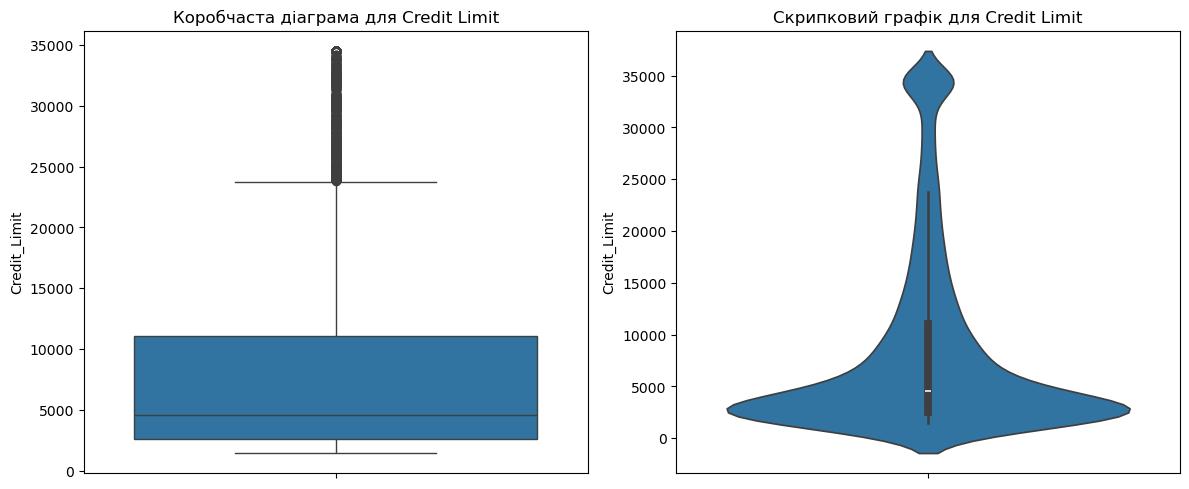

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.boxplot(y=df['Credit_Limit'], ax=axes[0])
axes[0].set_title('Коробчаста діаграма для Credit Limit')

sns.violinplot(y=df['Credit_Limit'], ax=axes[1])
axes[1].set_title('Скрипковий графік для Credit Limit')
plt.tight_layout()
plt.show()


C:\Users\Artem\AppData\Local\Temp\ipykernel_17292\214768654.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Total_Trans_Ct'], shade=True, ax=ax[1])


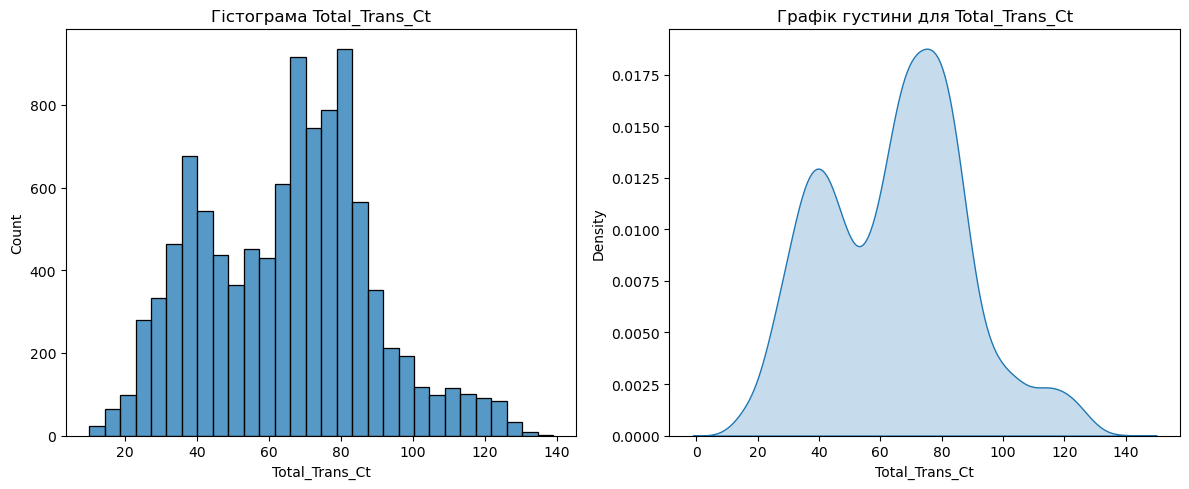

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))

# Гістограма
sns.histplot(df['Total_Trans_Ct'], kde=False, ax=ax[0], bins=30)
ax[0].set_title('Гістограма Total_Trans_Ct')

# Графік густини
sns.kdeplot(df['Total_Trans_Ct'], shade=True, ax=ax[1])
ax[1].set_title('Графік густини для Total_Trans_Ct')

plt.tight_layout()
plt.show()


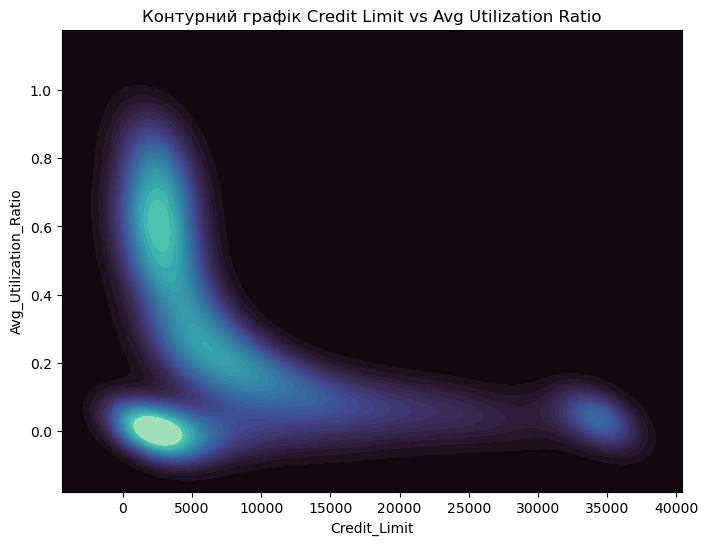

In [10]:
plt.figure(figsize=(8,6))
sns.kdeplot(
    x=df['Credit_Limit'],
    y=df['Avg_Utilization_Ratio'],
    cmap="mako", fill=True, thresh=0, levels=30
)
plt.title('Контурний графік Credit Limit vs Avg Utilization Ratio')
plt.show()


In [11]:
corr, p_value = pearsonr(df['Credit_Limit'], df['Total_Trans_Ct'])
print(f"Кореляція між Credit Limit та Total_Trans_Ct: {corr:.4f}, p-value: {p_value:.4e}")


Кореляція між Credit Limit та Total_Trans_Ct: 0.0759, p-value: 1.9965e-14


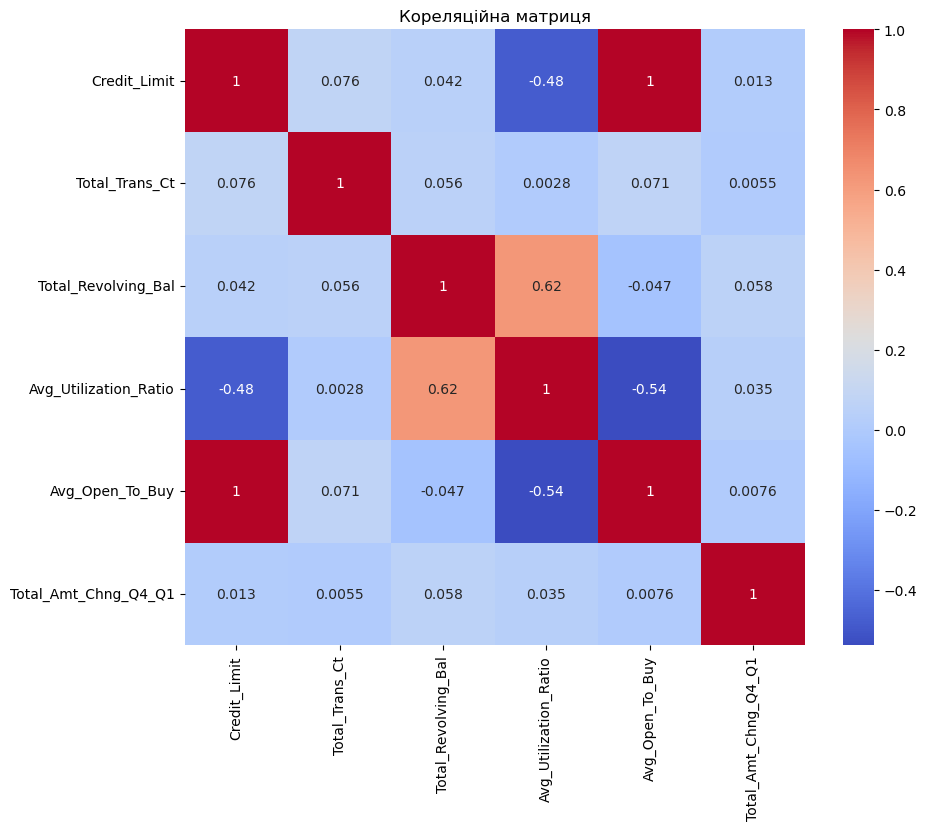

In [13]:
numeric_cols = ['Credit_Limit', 'Total_Trans_Ct', 'Total_Revolving_Bal', 'Avg_Utilization_Ratio', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1']
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Кореляційна матриця')
plt.show()


In [20]:
trans_ct_mode = mode(df['Total_Trans_Ct'], nan_policy='omit')
print("Мода для Total_Trans_Ct:", trans_ct_mode.mode)


Мода для Total_Trans_Ct: 81


In [22]:
credit_limit_sem = sem(df['Credit_Limit'], nan_policy='omit')
print("Стандартна похибка для Credit Limit:", credit_limit_sem)



Стандартна похибка для Credit Limit: 90.31606887805091


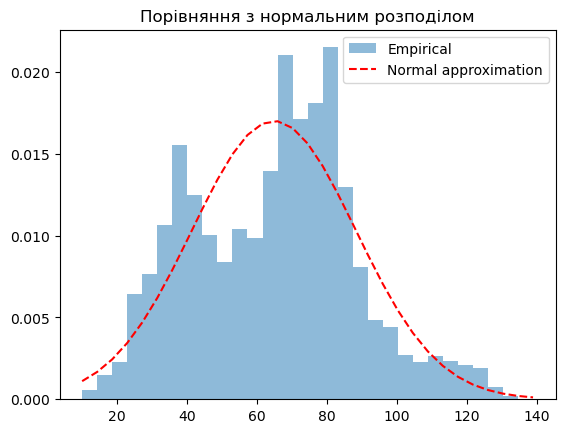

In [16]:
data = df['Total_Trans_Ct'].dropna()
mu, sigma = data.mean(), data.std()

# Порівняння з нормальним розподілом
count, bins, _ = plt.hist(data, bins=30, density=True, alpha=0.5, label='Empirical')
normal_pdf = norm.pdf(bins, mu, sigma)
plt.plot(bins, normal_pdf, 'r--', label='Normal approximation')
plt.title('Порівняння з нормальним розподілом')
plt.legend()
plt.show()


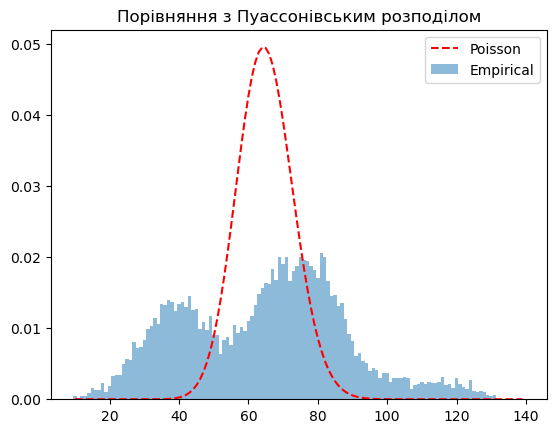

In [17]:
lambda_est = data.mean()
poisson_pmf = poisson.pmf(k=np.arange(data.min(), data.max()+1), mu=lambda_est)

# Побудуємо дискретну гістограму та порівняємо з пуассонівською теорією
counts, bins = np.histogram(data, bins=range(data.min(), data.max()+2), density=True)
plt.bar(bins[:-1], counts, width=1, alpha=0.5, label='Empirical')
plt.plot(np.arange(data.min(), data.max()+1), poisson_pmf, 'r--', label='Poisson')
plt.title('Порівняння з Пуассонівським розподілом')
plt.legend()
plt.show()


In [ ]:
data = df['Credit_Limit'].dropna().values
N = len(data)
iterations = 1000
bootstrap_means = []
np.random.seed(42)  

for i in range(iterations):
    sample = np.random.choice(data, size=N, replace=True)
    bootstrap_means.append(sample.mean())

low_ci = np.percentile(bootstrap_means, 2.5)
high_ci = np.percentile(bootstrap_means, 97.5)
print(f"95% довірчий інтервал для середнього Credit Limit: [{low_ci:.2f}, {high_ci:.2f}]")


95% довірчий інтервал для середнього Credit Limit: [8454.80, 8817.15]
